# Tian Chen


# 1: Import the spam dataset and print the first six rows.


In [64]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
from statistics import mean
from sklearn.linear_model import LogisticRegression


In [46]:
df = pd.read_csv(
    'C:/Users/ch199/OneDrive/Columbia University/ML/Midterm/spam_dataset.csv')
df.head(6)


,word_freq_make:,word_freq_address:,word_freq_all:,word_freq_3d:,word_freq_our:,word_freq_over:,word_freq_remove:,word_freq_internet:,word_freq_order:,word_freq_mail:,...,char_freq_;:,char_freq_(:,char_freq_[:,char_freq_!:,char_freq_$:,char_freq_#:,capital_run_length_average:,capital_run_length_longest:,capital_run_length_total:,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


# 2: Read through the documentation of the original dataset here: http://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names. The dependent variable is "spam" where one indicates that an email is spam and zero otherwise. Which three variables in the dataset do you think will be important predictors in a model of spam? Why?


The three variables that I choose are 'word_freq_credit:', 'word_freq_money:', and 'word_freq_order:'. These three variables respectively record the frequency of 'credit', 'money', and 'order'.

I think 'credit' is important because often times spam emails are trying to make money from the receivers, so it is highly likely that those emails would include credit-related things to attract the receivers.

'money' is important because a large quantity of spam emails are about advertisement of products or paid contents, and they are all about letting the receivers pay money.

'order' is important as I have often received spam emails that are like "order right now and save 80%", so it is possible that many spam emails are related to the word 'order'.


# 3: Visualize the univariate distribution of each of the variables in the previous question.


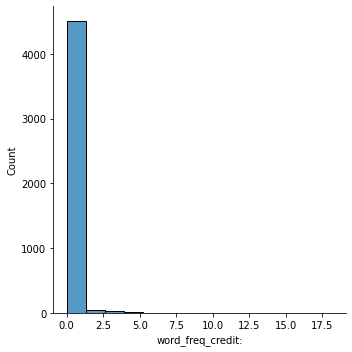

In [47]:

# the displot of word freq credit
sns.displot(x='word_freq_credit:', data=df)


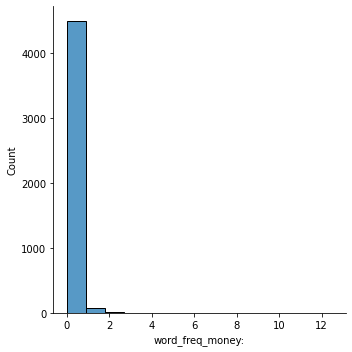

In [48]:
sns.displot(df, x='word_freq_money:')


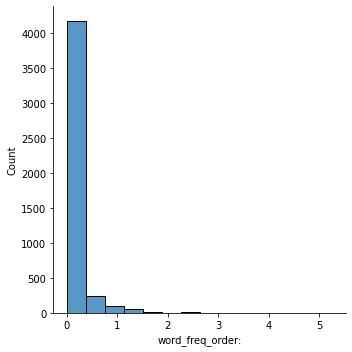

In [49]:
sns.displot(df, x='word_freq_order:')


# 4: Name each of the supervised learning models that we have learned thus far that are used to predict dependent variables like "spam".


KNN, Logistic Regression, Logistic Regression with L1/L2 penalty, SVM, decision tree, bagged tree, random forest


# 5: Describe the importance of training and test data. Why do we separate data into these subsets?


we split data into training group and testing group primarily to make our models work better. If we do not split our data and use the whole data to train our model, then we cannot validate our model by letting it make predictions, since the data that we use to test the model is encompassed in the data that we use to train the model, which would lead the model to make 100% correct predictions. Therefore, in order to see whether our model is capable of making good predictions, we must split our data.


# 6: What is k-fold cross validation and what do we use it for?


K-fold cv is a method to validate our models. Instead of splitting our data into training and testing sets, we split the data into K (can be any reasonable number) "folds", and we use we use cross validation to evaluate our model. For each fold, we use K-1 groups of data to train the model and use the remaining 1 group to test the model. Then, our model is fitted on training set and tested on test set, and we get the model evaluation scores, which we use to evaluate our model.

Cross validation is to remedy the setback of data splitting. Traditinoally, when we split data into training and testing sets, there is only a portion of the data that we can use to train the model. Now, if we use crovss validation, all data can be used for training the model. Thus, we can simultaneously use all of our data and see how well our model performs on unseen data.


# 7: How is k-fold cross validation different from stratified k-fold cross validation?


Stratified K-fold cv is different than K-fold cv in that SK-fold "folds" data in a way that mimicries the relative class frequencies on the entire dataset (Lecture 3 Slides). That is to say the folds of data retain the proportions of classes in the original dataset.

As a result, Stratified folds are representative of the classes in original dataset, and that helps reduce bias and variance in our model as classes in the dataset are less likely to be misrepresented and thus more likely to be fairly computed.


# The following codes are preparations for question 8-11


In [50]:
# Train test split
df_x = df[['word_freq_credit:', 'word_freq_money:', 'word_freq_order:']]
y = df['spam']
X = df_x
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)


In [51]:
#Scale and KFold
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
scaler.fit(X_test)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

kf = KFold(n_splits=5, random_state=35, shuffle=True)


# 8: Choose one model from question four. Split the data into training and test subsets. Build a model with the three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation.


My model is KNNClassifier.

I choose n_neighbors = 9 because my GridSearchCV, which I have set to avoid even numbers of n_neighbors, shows that 9 is the best parameter.


In [52]:
# KNN GridSearchCV
knn_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
print(knn_pipe.steps)

param_grid = {'kneighborsclassifier__n_neighbors': range(1, 15, 2)}
grid = GridSearchCV(knn_pipe, param_grid, cv=10)
grid.fit(X_train_scaled, y_train)
print(grid.best_params_)
print(grid.score(X_test_scaled, y_test))


[('standardscaler', StandardScaler()), ('kneighborsclassifier', KNeighborsClassifier())]
{'kneighborsclassifier__n_neighbors': 9}
0.7567332754126846


In [53]:
# KNN evaluation
# w/o cv
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(
    knn.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(knn.score(X_test_scaled, y_test)))

#w/ cv
print("EachCV:\n{}".format(cross_val_score(
    KNeighborsClassifier(n_neighbors=9), X_train_scaled, y_train, cv=kf)))
print("KFold:\n{:.3f}".format(
    mean(cross_val_score(KNeighborsClassifier(n_neighbors=9), X_train_scaled, y_train, cv=kf))))


Training set accuracy: 0.766
Test set accuracy: 0.755
EachCV:
[0.75942029 0.74347826 0.78550725 0.76376812 0.74057971]
KFold:
0.759


# 9: Choose a second model from question four. Using the same three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous model?


My model is L1 Logsitic Regression.

My C is 1.31. I choose this C because it is the best parameter generated by GridSearchCV.

L1 Logistic Regression did not show improvements over KNNClassifier. On the contrary, it performed worse than KNN.


In [54]:
# L1 G
param_l1 = {'C': np.arange(.01, 10, .1), 'penalty': ['l1']}

grid_l1 = GridSearchCV(LogisticRegression(solver='liblinear'), param_l1, cv=kf)
grid_l1.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_l1.best_score_))
print("best parameters: {}".format(grid_l1.best_params_))


best mean cross-validation score: 0.747
best parameters: {'C': 1.31, 'penalty': 'l1'}


In [55]:
# L1 evaluation
# w/o cv
l1 = LogisticRegression(C=1.31, penalty='l1', solver='liblinear',
                        max_iter=10000).fit(X_train_scaled, y_train)
print("Lasso.coef_:\n{}".format(l1.coef_))
print("Training set score: {:.3f}".format(l1.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(l1.score(X_test_scaled, y_test)))

#w/ cv
l1_cv = cross_val_score(LogisticRegression(
    C=1.31, penalty='l1', solver='liblinear', max_iter=10000), X_train_scaled, y_train, cv=kf)
print("EachCV:\n{}".format(l1_cv))
print("KFold:\n{:.3f}".format(mean(l1_cv)))


Lasso.coef_:
[[1.91050093 1.04836275 0.31322716]]
Training set score: 0.748
Test set score: 0.745
EachCV:
[0.76231884 0.72753623 0.75942029 0.75362319 0.73188406]
KFold:
0.747


# 10: Choose a third model from question four. Using the same three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous models?


My model is L2 Logistic Regression.

My C is 2.81. I choose this C because it is the best parameter generated by GridSearchCV.

L2 performed slightly better than L1, but it is not as good as KNNClassifier.


In [56]:
# L2 G
param_l2 = {'C': np.arange(.01, 10, .1), 'penalty': ['l2']}

grid_l2 = GridSearchCV(LogisticRegression(solver='newton-cg'), param_l2, cv=kf)
grid_l2.fit(X_train_scaled, y_train)

print("best mean cross-validation score: {:.3f}".format(grid_l2.best_score_))
print("best parameters: {}".format(grid_l2.best_params_))


best mean cross-validation score: 0.748
best parameters: {'C': 2.81, 'penalty': 'l2'}


In [57]:
# L2 evaluation
# w/o cv
l2 = LogisticRegression(C=2.81, penalty='l2', solver='newton-cg',
                        max_iter=10000).fit(X_train_scaled, y_train)
print("Ridge.coef_:\n{}".format(l2.coef_))
print("Training set score: {:.3f}".format(l2.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(l2.score(X_test_scaled, y_test)))

#w/ cv
l2_cv = cross_val_score(LogisticRegression(
    C=2.81, penalty='l2', solver='newton-cg', max_iter=10000), X_train_scaled, y_train, cv=kf)
print("EachCV:\n{}".format(l2_cv))
print("KFold:\n{:.3f}".format(mean(l2_cv)))


Ridge.coef_:
[[1.91062332 1.05006155 0.31435695]]
Training set score: 0.748
Test set score: 0.745
EachCV:
[0.76376812 0.72898551 0.75942029 0.75362319 0.73188406]
KFold:
0.748


# 11: Choose a fourth model from question four. Using the same three variables in the dataset that you think will be good predictors of "spam". Describe why you chose any particular parameters for your model (e.g.- if you used KNN how did you decide to choose a specific value for k). Run the model and evaluate prediction error in two ways: A) On test data directly and B) using k-fold cross-validation. Did this model predict test data better than your previous models?


My model is Logistic Regression without penalty.

There is no tuning parameter for Logistic Regression without penalty.

Logistic Regression is outperformed by every other models.


In [58]:
# Log Reg Evaluation
# w/o cv
logreg = LogisticRegression(max_iter=10000).fit(X_train_scaled, y_train)

print("logreg .coef_:\n{}".format(logreg.coef_))
print("Training set score: {:.3f}".format(
    logreg.score(X_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test_scaled, y_test)))

#w/ cv
logcv = cross_val_score(LogisticRegression(
    max_iter=10000), X_train_scaled, y_train, cv=kf)
print("EachCV:\n{}".format(logcv))
print("KFold:\n{:.3f}".format(mean(logcv)))


logreg .coef_:
[[1.81500449 1.04615769 0.31655346]]
Training set score: 0.745
Test set score: 0.745
EachCV:
[0.76376812 0.72753623 0.75652174 0.74927536 0.73188406]
KFold:
0.746


# 12: Now rerun your best model from questions 8 through 11, but this time add three new variables to the model that you think will increase prediction accuracy. Did this model predict test data better than your previous models?


The best model is KNNClassifier.


With the three additional variables, the score of the new KNN model improved. The model predicted test data better than my previous models.


In [59]:
# Train test split and scaling
df_x2 = df[['word_freq_credit:', 'word_freq_money:', 'word_freq_order:',
            'word_freq_your:', 'word_freq_our:', 'capital_run_length_average:']]
y = df['spam']
X2 = df_x2
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, random_state=35)

scaler = preprocessing.StandardScaler()
scaler.fit(X2_train)
scaler.fit(X2_test)
X2_train_scaled = scaler.transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)


In [60]:
# KNN
# w/o cv
knn_6 = KNeighborsClassifier(n_neighbors=9)
knn_6.fit(X2_train_scaled, y_train)

print("Training set accuracy: {:.3f}".format(
    knn_6.score(X2_train_scaled, y_train)))
print("Test set accuracy: {:.3f}".format(knn_6.score(X2_test_scaled, y_test)))

#w/ cv
print("EachCV:\n{}".format(cross_val_score(KNeighborsClassifier(
    n_neighbors=9), X2_train_scaled, y_train, cv=kf)))
print("KFold:\n{:.3f}".format(
    mean(cross_val_score(KNeighborsClassifier(n_neighbors=9), X2_train_scaled, y_train, cv=kf))))


Training set accuracy: 0.857
Test set accuracy: 0.829
EachCV:
[0.84927536 0.82173913 0.84202899 0.85217391 0.81304348]
KFold:
0.836


# 13: Rerun all your other models with this final set of six variables, evaluate prediction error, and choose a final model. Why did you select this model among all of the models that you ran?


I would select KNNClassifier as my final model.

The reason is that with six variables, it has the best scores in training set accuracy, test set accuracy, and cross validation model evaluation score among all models.


In [61]:
# L2
# w/o cv
l2_6 = LogisticRegression(C=2.81, penalty='l2', solver='newton-cg',
                          max_iter=10000).fit(X2_train_scaled, y_train)
print("Ridge.coef_:\n{}".format(l2_6.coef_))
print("Training set score: {:.3f}".format(
    l2_6.score(X2_train_scaled, y_train)))
print("Test set score: {:.3f}".format(l2_6.score(X2_test_scaled, y_test)))

#w/ cv
l2_cv_6 = cross_val_score(LogisticRegression(
    C=2.81, penalty='l2', solver='newton-cg', max_iter=10000), X2_train_scaled, y_train, cv=kf)
print("EachCV:\n{}".format(l2_cv_6))
print("KFold:\n{:.3f}".format(mean(l2_cv_6)))


Ridge.coef_:
[[1.46822895 0.65643011 0.20980407 0.75502584 0.5516681  2.69428779]]
Training set score: 0.810
Test set score: 0.801
EachCV:
[0.82173913 0.77536232 0.81449275 0.8115942  0.79130435]
KFold:
0.803


In [62]:
# L1
# w/o cv
l1_6 = LogisticRegression(C=1.31, penalty='l1', solver='liblinear',
                          max_iter=10000).fit(X2_train_scaled, y_train)
print("Lasso.coef_:\n{}".format(l1_6.coef_))
print("Training set score: {:.3f}".format(
    l1_6.score(X2_train_scaled, y_train)))
print("Test set score: {:.3f}".format(l1_6.score(X2_test_scaled, y_test)))

#w/ cv
l1_cv_6 = cross_val_score(LogisticRegression(
    C=1.31, penalty='l1', solver='liblinear', max_iter=10000), X2_train_scaled, y_train, cv=kf)
print("EachCV:\n{}".format(l1_cv_6))
print("KFold:\n{:.3f}".format(mean(l1_cv_6)))


Lasso.coef_:
[[1.45586902 0.65370171 0.20814478 0.75403555 0.55014738 2.71059191]]
Training set score: 0.810
Test set score: 0.800
EachCV:
[0.82028986 0.77536232 0.81594203 0.8115942  0.79275362]
KFold:
0.803


In [63]:
# Log Reg
# w/o cv
logreg_6 = LogisticRegression(max_iter=10000).fit(X2_train_scaled, y_train)

print("logreg .coef_:\n{}".format(logreg_6.coef_))
print("Training set score: {:.3f}".format(
    logreg_6.score(X2_train_scaled, y_train)))
print("Test set score: {:.3f}".format(logreg_6.score(X2_test_scaled, y_test)))

#w/ cv
logcv_6 = cross_val_score(LogisticRegression(
    max_iter=10000), X2_train_scaled, y_train, cv=kf)
print("EachCV:\n{}".format(logcv_6))
print("KFold:\n{:.3f}".format(mean(logcv_6)))


logreg .coef_:
[[1.40424262 0.65779346 0.2133687  0.75456193 0.55107367 2.60162343]]
Training set score: 0.808
Test set score: 0.801
EachCV:
[0.8173913  0.77826087 0.81304348 0.8115942  0.78550725]
KFold:
0.801


# 14: What variable that currently is not in your model, if included, would be likely to increase your final model's predictive power? For this answer try to speculate about a variable outside the variables available in the data that would improve you model.


One variable that can be useful is the email clients. With this variable being present, one can build a model in a model-based perspective, such as looking at the differences between the frequencies of a certain vocabulary that appear in spam emails that are sent to Gmail users and Outlook users. Thus, our model can learn clients-specific spams and, consequently, more accurately predict spam.


# 15: Lastly, you have listed each of the models that we have learned to use to predict dependent variables like spam. List each model we have focused on in class thus far that you could use to evaluate data with a continuous dependent variable.


KNN, linear regression, Ridge, Lasso, SVM, decision tree, bagged tree, random forest
